In [81]:
import os
import kagglehub
import pandas as pd
import ast
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from collections import Counter
import json

In [82]:
# Download latest version
path = kagglehub.dataset_download("rounakbanik/the-movies-dataset")

print("Path to dataset files:", path)

Path to dataset files: /Users/matthewpecko/.cache/kagglehub/datasets/rounakbanik/the-movies-dataset/versions/7


In [83]:
# Load the datasets
ratings_path = os.path.join(path, "ratings.csv")
movies_metadata_path = os.path.join(path, "movies_metadata.csv")

# Load the ratings and movies metadata CSVs
ratings_df = pd.read_csv(ratings_path)
movies_metadata_df = pd.read_csv(movies_metadata_path, low_memory=False)

# Ensure that both 'movieId' and 'id' columns are of the same type
# Convert 'id' in movies_metadata_df to numeric (integer), coercing errors to NaN
movies_metadata_df['id'] = pd.to_numeric(movies_metadata_df['id'], errors='coerce')

# Convert 'movieId' in ratings_df to numeric, if it's not already int
ratings_df['movieId'] = pd.to_numeric(ratings_df['movieId'], errors='coerce')

# Convert 'userId' in ratings_df to numeric, if it's not already int
ratings_df['userId'] = pd.to_numeric(ratings_df['userId'], errors='coerce')

ratings_df = ratings_df.dropna(subset=['userId', 'movieId'])
movies_metadata_df = movies_metadata_df.dropna(subset=['id'])

In [84]:
ratings_df

,userId,movieId,rating,timestamp
0,1,110,1.0,1425941529
1,1,147,4.5,1425942435
2,1,858,5.0,1425941523
3,1,1221,5.0,1425941546
4,1,1246,5.0,1425941556
...,...,...,...,...
26024284,270896,58559,5.0,1257031564
26024285,270896,60069,5.0,1257032032
26024286,270896,63082,4.5,1257031764
26024287,270896,64957,4.5,1257033990


In [85]:
movies_metadata_df

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862.0,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844.0,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602.0,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357.0,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862.0,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45461,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",http://www.imdb.com/title/tt6209470/,439050.0,tt6209470,fa,رگ خواب,Rising and falling between a man and woman.,...,NaN,0.0,90.0,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",Released,Rising and falling between a man and woman,Subdue,False,4.0,1.0
45462,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,111109.0,tt2028550,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,...,2011-11-17,0.0,360.0,"[{'iso_639_1': 'tl', 'name': ''}]",Released,NaN,Century of Birthing,False,9.0,3.0
45463,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",NaN,67758.0,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",...,2003-08-01,0.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A deadly game of wits.,Betrayal,False,3.8,6.0
45464,False,NaN,0,[],NaN,227506.0,tt0008536,en,Satana likuyushchiy,"In a small town live two brothers, one a minis...",...,1917-10-21,0.0,87.0,[],Released,NaN,Satan Triumphant,False,0.0,0.0


In [86]:
# Perform the merge
merged_df = pd.merge(movies_metadata_df, ratings_df, left_on='id', right_on='movieId', how='left')
merged_df = merged_df.dropna(subset=['userId', 'movieId', 'id'])

In [87]:
merged_df

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,status,tagline,title,video,vote_average,vote_count,userId,movieId,rating,timestamp
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862.0,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,Released,NaN,Toy Story,False,7.7,5415.0,1923.0,862.0,3.0,8.583350e+08
1,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862.0,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,Released,NaN,Toy Story,False,7.7,5415.0,2103.0,862.0,5.0,9.460449e+08
2,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862.0,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,Released,NaN,Toy Story,False,7.7,5415.0,5380.0,862.0,1.0,8.789416e+08
3,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862.0,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,Released,NaN,Toy Story,False,7.7,5415.0,6177.0,862.0,4.0,8.594152e+08
4,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862.0,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,Released,NaN,Toy Story,False,7.7,5415.0,6525.0,862.0,4.0,8.573890e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11475523,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,111109.0,tt2028550,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,...,Released,NaN,Century of Birthing,False,9.0,3.0,33940.0,111109.0,2.5,1.405879e+09
11475524,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,111109.0,tt2028550,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,...,Released,NaN,Century of Birthing,False,9.0,3.0,172224.0,111109.0,3.0,1.399503e+09
11475525,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,111109.0,tt2028550,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,...,Released,NaN,Century of Birthing,False,9.0,3.0,210792.0,111109.0,3.0,1.467090e+09
11475526,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,111109.0,tt2028550,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,...,Released,NaN,Century of Birthing,False,9.0,3.0,225396.0,111109.0,3.5,1.399303e+09


In [88]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11437637 entries, 0 to 11475527
Data columns (total 28 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   adult                  object 
 1   belongs_to_collection  object 
 2   budget                 object 
 3   genres                 object 
 4   homepage               object 
 5   id                     float64
 6   imdb_id                object 
 7   original_language      object 
 8   original_title         object 
 9   overview               object 
 10  popularity             object 
 11  poster_path            object 
 12  production_companies   object 
 13  production_countries   object 
 14  release_date           object 
 15  revenue                float64
 16  runtime                float64
 17  spoken_languages       object 
 18  status                 object 
 19  tagline                object 
 20  title                  object 
 21  video                  object 
 22  vote_average         

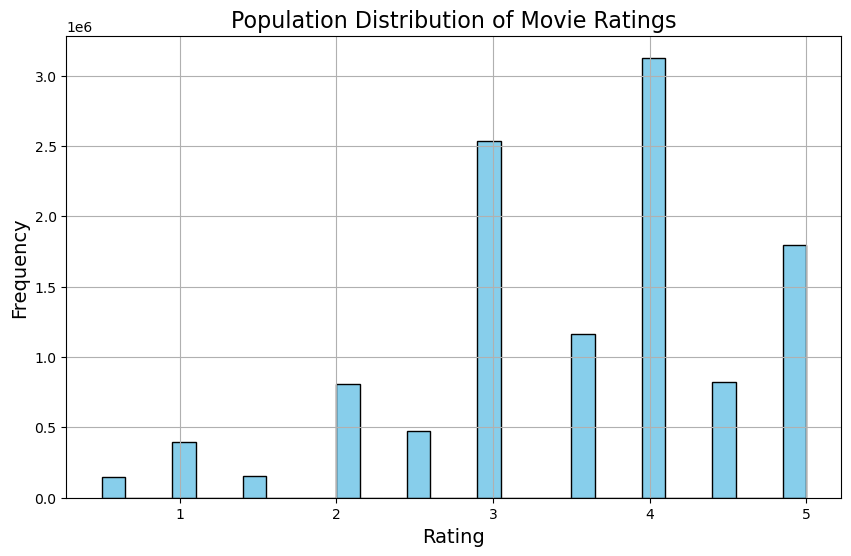

In [89]:
# 1. Population Distribution of All Movie Ratings
plt.figure(figsize=(10, 6))
plt.hist(merged_df['rating'].dropna(), bins=30, color='skyblue', edgecolor='black')
plt.title('Population Distribution of Movie Ratings', fontsize=16)
plt.xlabel('Rating', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(True)
plt.show()

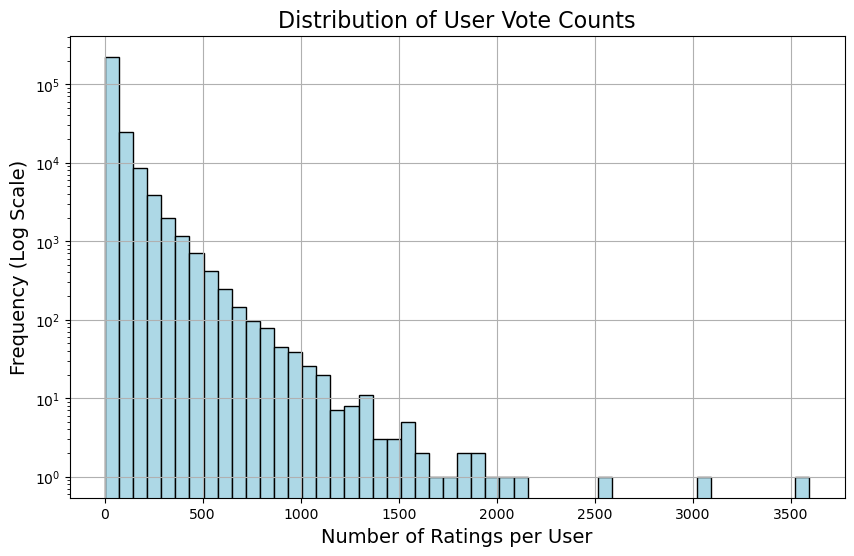

In [90]:
# Group by 'userId' and count the number of ratings each user has provided
user_vote_counts = merged_df.groupby('userId')['rating'].count()

# Plot the distribution of the number of ratings per userId
plt.figure(figsize=(10, 6))
plt.hist(user_vote_counts, bins=50, color='lightblue', edgecolor='black', log=True)
plt.title('Distribution of User Vote Counts', fontsize=16)
plt.xlabel('Number of Ratings per User', fontsize=14)
plt.ylabel('Frequency (Log Scale)', fontsize=14)
plt.grid(True)
plt.show()

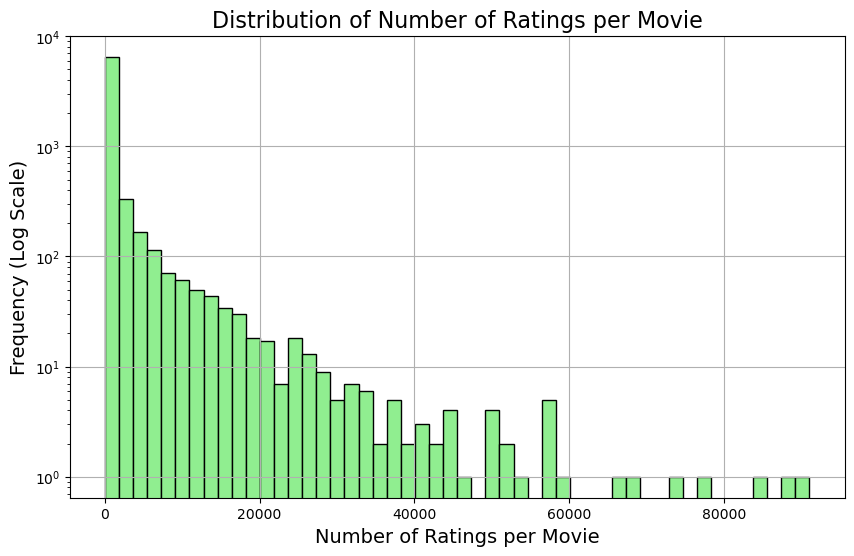

In [91]:
# Group by 'movieId' and count the number of ratings each movie has received
movie_rating_counts = merged_df.groupby('movieId')['rating'].count()

# Plot the distribution of the number of ratings per movieId
plt.figure(figsize=(10, 6))
plt.hist(movie_rating_counts, bins=50, color='lightgreen', edgecolor='black', log=True)
plt.title('Distribution of Number of Ratings per Movie', fontsize=16)
plt.xlabel('Number of Ratings per Movie', fontsize=14)
plt.ylabel('Frequency (Log Scale)', fontsize=14)
plt.grid(True)
plt.show()

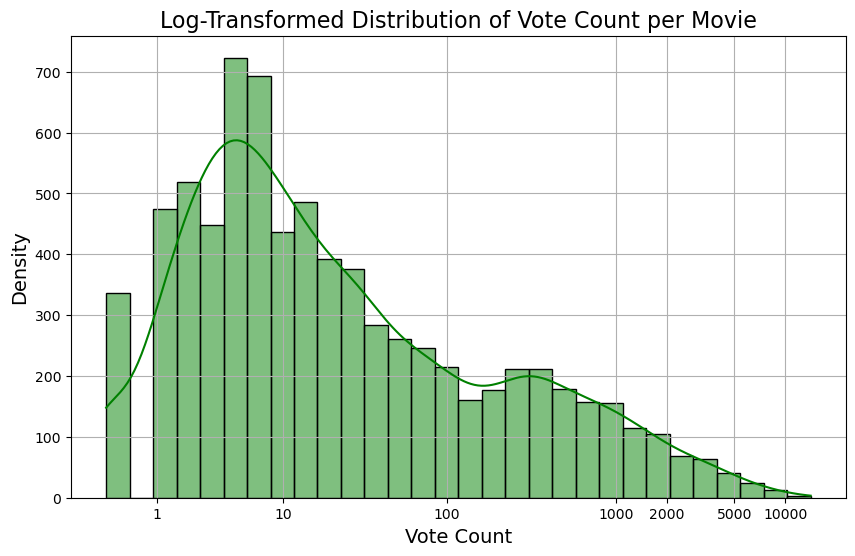

In [92]:
# Create a new DataFrame with unique movieId by dropping duplicates in ratings
unique_movies_df = ratings_df.drop_duplicates(subset='movieId')

# Merge the unique movies DataFrame with movies_metadata_df on 'movieId' and 'id'
unique_movies_df = pd.merge(unique_movies_df, movies_metadata_df[['id', 'vote_count']], left_on='movieId', right_on='id', how='left')

# Drop rows with missing 'vote_count'
unique_movies_df = unique_movies_df.dropna(subset=['vote_count'])

# Option 2: Log transform the vote counts (to handle wide range of values)
log_vote_counts = np.log1p(unique_movies_df['vote_count'])  # np.log1p(x) = log(x + 1) to handle 0 values

# Plot the log-transformed vote count distribution
plt.figure(figsize=(10, 6))
sns.histplot(log_vote_counts, kde=True, bins=30, color='green')
plt.title('Log-Transformed Distribution of Vote Count per Movie', fontsize=16)
plt.xlabel('Vote Count', fontsize=14)
plt.ylabel('Density', fontsize=14)

# Set x-axis ticks for real vote count values (undoing the log transformation)
ticks = [1, 10, 100, 1000, 2000, 5000, 10000]  # Adjust this list to your dataset's vote range
tick_labels = [str(tick) for tick in ticks]
plt.xticks(np.log1p(ticks), tick_labels)  # Use log1p(ticks) for correct tick placement

# Show the plot
plt.grid(True)
plt.show()

In [94]:
# Directly using json.loads() for faster genre parsing
def fast_parse_genres(genres_str):
    try:
        # Use json.loads instead of ast.literal_eval for better performance
        genres = json.loads(genres_str.replace("'", '"'))  # Convert single quotes to double quotes if needed
        return [genre['name'] for genre in genres] if genres else []
    except (ValueError, json.JSONDecodeError):
        return []  # Return an empty list if parsing fails

# Apply faster genre parsing
merged_df['genres_list'] = merged_df['genres'].apply(fast_parse_genres)

# Explode the dataframe so each genre gets its own row
exploded_df = merged_df.explode('genres_list')

# Group by genre and rating to count the number of votes
heatmap_data = exploded_df.groupby(['genres_list', 'rating']).size().unstack(fill_value=0)

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='coolwarm', annot=False)
plt.title('Number of Votes by Genre and Rating', fontsize=16)
plt.xlabel('Genre', fontsize=14)
plt.ylabel('Rating', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.show()

NameError: name 'json' is not defined